### Boiler Plate Code

In [67]:
import random

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange
%matplotlib inline

In [68]:
# for managing file opening and closing

def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

file_path = '../QAPInstances/tai30b.dat'
file_it = iter(read_integers('../QAPInstances/tai30b.dat'))

# Number of points
n = next(file_it)

# Distance between locations
W = np.array([[next(file_it) for j in range(n)] for i in range(n)])
D = np.array([[next(file_it) for j in range(n)] for i in range(n)])


In [69]:
# vectorised cost function
def cost(X, D, W) -> float:
    return np.sum(W * D[X][:, X])

### Simmulated Annealing 

In [70]:
# neighbor generation
# TODO: explore different generation strategies, shifting only two indices isn't much

def gen_neighbour(perm):
    # randomly generates a neighbor through swapping two indices

    new_perm = perm[:]
    # Two random indexes
    i = random.randint(0, len(perm)-1)
    j = random.randint(0, len(perm)-1)

    new_perm[i], new_perm[j] = new_perm[j], new_perm[i]        
    return new_perm

In [71]:
def SimulatedAnnealing(X, D, W, T0, Tmin, n_iter, rate=0.99):
    
    perm = X
    curr_cost = cost(perm, D, W)
    best_cost = curr_cost
    T = T0
    perm_history = [perm]
    cost_history = [curr_cost]
    best_cost_history = [best_cost]

    while T > Tmin:
        it = 0
        while(it < n_iter):
            new_perm = get_neighbour(X)
            new_cost = cost(new_perm, D, W)
            
            ΔE = new_cost - curr_cost
            if (ΔE <= 0) or (np.exp( -ΔE/T ) >= np.random.uniform()):
                perm = new_perm
                curr_cost = new_cost
                
                if curr_cost < best_cost:
                    best_cost = curr_cost
                    best_perm = perm
                    
            it += 1
            
            perm_history.append(perm)
            cost_history.append(curr_cost)
            best_cost_history.append(best_cost)
    
        T *= rate
        
    return best_perm, best_cost, perm_history, cost_history, best_cost_history

### Testing

In [72]:
%%time
init = list(range(len(W)))
best_perm, best_cost, perm_history, cost_history, best_cost_history = SimulatedAnnealing(init, D, W, T0=100_000_000, Tmin=1000, n_iter=10, rate=0.99)

CPU times: user 301 ms, sys: 4.85 ms, total: 306 ms
Wall time: 311 ms


In [73]:
bests = []
alls  = []
n_epochs = 5

for _ in trange(n_epochs):
    init = np.array(list(range(len(D))))
    np.random.shuffle(init)
    
    best_perm, best_cost, perm_history, cost_history, best_cost_history = SimulatedAnnealing(
                init, D, W, T0=100_000_000, Tmin=100, n_iter=10, rate=0.99)
    
    bests.append(best_cost_history)
    alls.append(cost_history)

100%|██████████| 5/5 [00:01<00:00,  3.47it/s]


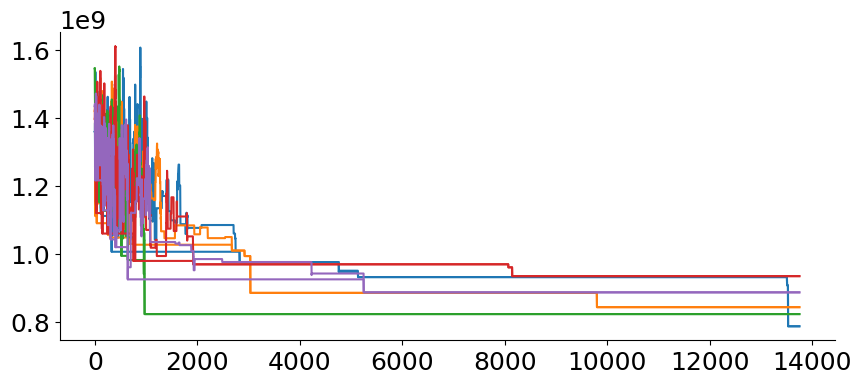

In [74]:
fig, ax = plt.subplots(figsize=(10, 4))


for i, (best, all_) in enumerate(zip(bests, alls)):
    ax.plot(all_, color=f'C{i}')
    ax.plot(best, color=f'C{i}')

sns.despine()
plt.show()